---
## Question 7

In [1]:
import datetime
print(datetime.datetime.now())

2020-12-13 19:43:59.566068


In [2]:
import pandas as pd
import numpy as np
import sklearn

print('scikit-learn: {}'.format(sklearn.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

scikit-learn: 0.23.2
pandas: 1.0.5
numpy: 1.18.5


In [3]:
import os
os.getcwd()

'C:\\Users\\user\\Downloads\\869\\Individual'

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

### Task 2a - Preprocess the data, and describe steps 

In [5]:
# Read in the data
df = pd.read_csv("OJ.csv")

In [6]:
# TODO: continue here to perform the given task. 
# Don't forget to document your code!
# Use as many cells as you'd like!
# Don't print out large volumes of output!
# Don't forget to save/export as PDF!
# Make sure to always run all cells in order! Always restart kernel and run all cells before creating the PDF

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WeekofPurchase  1070 non-null   int64  
 1   StoreID         1070 non-null   int64  
 2   PriceCH         1070 non-null   float64
 3   PriceMM         1070 non-null   float64
 4   DiscCH          1070 non-null   float64
 5   DiscMM          1070 non-null   float64
 6   SpecialCH       1070 non-null   int64  
 7   SpecialMM       1070 non-null   int64  
 8   LoyalCH         1070 non-null   float64
 9   Purchase        1070 non-null   object 
dtypes: float64(5), int64(4), object(1)
memory usage: 83.7+ KB


In [8]:
df.head()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,Purchase
0,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,CH
1,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,CH
2,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,CH
3,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,MM
4,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,CH


In [9]:
df.tail()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,Purchase
1065,252,7,1.86,2.09,0.1,0.00,0,0,0.587822,CH
1066,256,7,1.86,2.18,0.0,0.00,0,0,0.670258,CH
1067,257,7,1.86,2.18,0.0,0.00,0,0,0.736206,MM
1068,261,7,1.86,2.13,0.0,0.24,0,0,0.588965,CH
1069,270,1,1.86,2.18,0.0,0.00,0,0,0.671172,CH


In [10]:
df.shape

(1070, 10)

### Target encoding to [0, 1]: purchase CH as 1, MM as 0 in this binary classification problem
- As we have LoyalCH to measure historical customer loyalty to CH, not LoyalMM or information on loyalty for MM, we can predict whether a customer will purchase CH or not, with purchasing CH as 1, then MM as 0.

In [11]:
df['Purchase'] = df['Purchase'].replace(['CH', 'MM'], [1, 0])
df.head()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,Purchase
0,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1
1,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1
2,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,1
3,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,0
4,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1


### Split data into training and testing
- Assume we take 20% of data for testing

In [12]:
X = df.iloc[:, :9]
y = df.iloc[:, 9]

X.head()
y.head()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH
0,237,1,1.75,1.99,0.00,0.0,0,0,0.500000
1,239,1,1.75,1.99,0.00,0.3,0,1,0.600000
2,245,1,1.86,2.09,0.17,0.0,0,0,0.680000
3,227,1,1.69,1.69,0.00,0.0,0,0,0.400000
4,228,7,1.69,1.69,0.00,0.0,0,0,0.956535


0    1
1    1
2    1
3    0
4    1
Name: Purchase, dtype: int64

### Task 2b - Split the data into training and testing sets
- Shuffle the data before splitting to avoid original dataset's features having any kind of dependency ordering  

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

X_train.head()
y_train.head()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH
351,278,7,2.06,2.13,0.0,0.0,0,0,0.982408
530,236,2,1.75,1.99,0.0,0.0,0,0,0.680000
896,259,7,1.86,2.18,0.0,0.0,0,0,0.868928
947,260,3,1.99,2.09,0.0,0.0,0,0,0.011649
936,231,2,1.69,1.69,0.3,0.0,1,0,0.135607


351    1
530    0
896    1
947    0
936    0
Name: Purchase, dtype: int64

### Task 2a Continued - Preprocess data to standardize numeric features, and one hot encode categorical data
#### Preprocess training data

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [15]:
features = ['WeekofPurchase', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'LoyalCH']
scaler = StandardScaler().fit(X_train[features])
X_train_f = scaler.transform(X_train[features])

type(X_train_f)

numpy.ndarray

In [16]:
X_train_f = pd.DataFrame(X_train_f, columns=features)
X_train_f.head()

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,LoyalCH
0,1.511856,1.873662,0.338199,-0.429041,-0.574531,1.353941
1,-1.165298,-1.131082,-0.702628,-0.429041,-0.574531,0.374277
2,0.300763,-0.064882,0.709923,-0.429041,-0.574531,0.986317
3,0.364505,1.195171,0.040820,-0.429041,-0.574531,-1.790875
4,-1.484006,-1.712645,-2.932971,2.150027,-0.574531,-1.389308


In [17]:
ohe = OneHotEncoder(categories='auto', handle_unknown='ignore', sparse=False)
ohe = ohe.fit(X_train[['StoreID']])
ohe_feature_names = list(ohe.get_feature_names(['StoreID']))

print("\n Names of {} OHE features:".format(len(ohe_feature_names)))
print(ohe_feature_names)


 Names of 5 OHE features:
['StoreID_1', 'StoreID_2', 'StoreID_3', 'StoreID_4', 'StoreID_7']


In [18]:
X_train_ohe = ohe.transform(X_train[['StoreID']])
ohe_features_df = pd.DataFrame(X_train_ohe, columns=ohe_feature_names)
ohe_features_df.head()

,StoreID_1,StoreID_2,StoreID_3,StoreID_4,StoreID_7
0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [19]:
X_train_all = pd.concat([X_train_f, X_train[['SpecialCH', 'SpecialMM']].reset_index(drop=True), ohe_features_df], axis=1)
X_train_all.head()

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,LoyalCH,SpecialCH,SpecialMM,StoreID_1,StoreID_2,StoreID_3,StoreID_4,StoreID_7
0,1.511856,1.873662,0.338199,-0.429041,-0.574531,1.353941,0,0,0.0,0.0,0.0,0.0,1.0
1,-1.165298,-1.131082,-0.702628,-0.429041,-0.574531,0.374277,0,0,0.0,1.0,0.0,0.0,0.0
2,0.300763,-0.064882,0.709923,-0.429041,-0.574531,0.986317,0,0,0.0,0.0,0.0,0.0,1.0
3,0.364505,1.195171,0.040820,-0.429041,-0.574531,-1.790875,0,0,0.0,0.0,1.0,0.0,0.0
4,-1.484006,-1.712645,-2.932971,2.150027,-0.574531,-1.389308,1,0,0.0,1.0,0.0,0.0,0.0


#### Preprocess testing data

In [20]:
X_test_f = scaler.transform(X_test[features])

In [21]:
X_test.head()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH
644,239,3,1.79,2.23,0.0,0.0,0,0,0.670149
629,260,2,1.86,2.18,0.0,0.7,0,0,0.456000
70,274,4,1.99,2.09,0.0,0.4,0,0,0.718311
962,227,1,1.69,1.69,0.0,0.0,0,0,0.600000
787,273,3,1.99,2.09,0.0,0.4,0,0,0.053687


In [22]:
X_test_f = pd.DataFrame(X_test_f, columns=features)
X_test_f.head()

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,LoyalCH
0,-0.974072,-0.743373,1.081647,-0.429041,-0.574531,0.342364
1,0.364505,-0.064882,0.709923,-0.429041,2.712893,-0.351381
2,1.256889,1.195171,0.040820,-0.429041,1.303997,0.498387
3,-1.738973,-1.712645,-2.932971,-0.429041,-0.574531,0.115113
4,1.193147,1.195171,0.040820,-0.429041,1.303997,-1.654691


In [23]:
X_test_ohe = ohe.transform(X_test[['StoreID']])

In [24]:
X_test_df = pd.DataFrame(X_test_ohe, columns=ohe_feature_names)
X_test_df.head()

,StoreID_1,StoreID_2,StoreID_3,StoreID_4,StoreID_7
0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [25]:
X_test_all = pd.concat([X_test_f, X_test[['SpecialCH', 'SpecialMM']].reset_index(drop=True),X_test_df], axis=1)
X_test_all.head()

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,LoyalCH,SpecialCH,SpecialMM,StoreID_1,StoreID_2,StoreID_3,StoreID_4,StoreID_7
0,-0.974072,-0.743373,1.081647,-0.429041,-0.574531,0.342364,0,0,0.0,0.0,1.0,0.0,0.0
1,0.364505,-0.064882,0.709923,-0.429041,2.712893,-0.351381,0,0,0.0,1.0,0.0,0.0,0.0
2,1.256889,1.195171,0.040820,-0.429041,1.303997,0.498387,0,0,0.0,0.0,0.0,1.0,0.0
3,-1.738973,-1.712645,-2.932971,-0.429041,-0.574531,0.115113,0,0,1.0,0.0,0.0,0.0,0.0
4,1.193147,1.195171,0.040820,-0.429041,1.303997,-1.654691,0,0,0.0,0.0,1.0,0.0,0.0


In [26]:
y_test.head()

644    1
629    0
70     1
962    1
787    1
Name: Purchase, dtype: int64

### There's moderate imbalance in the dataset
- SMOTE in pipeline to fix the imbalanced dataset

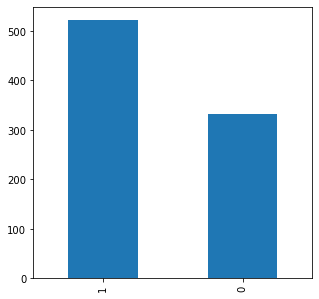

In [27]:
pd.Series(y_train).value_counts().plot.bar(figsize=(5,5));

- 61.1% of all training instances have purchased CH orange juice vs. MM

In [28]:
y_train.sum()/len(y_train)

0.610981308411215

---
### Task 2c - Build and tune three models.  Print out the best hyperparameter values, and model performance.

### Using Pycaret to get an overview of top performing models, as a guide for model selection

In [29]:
from pycaret.classification import *

### Set up the raw data after target was encoded to [0, 1]:
- feature_selection_threshold=0.9, remove_outliers=True, interaction_threshold=0.4, ignore_low_variance=True, multicollinearity_threshold=0.95, train_size=0.8 
- Shuffle the data in train and test split: data_split_shuffle = True
- Do 5 folds of Stratified K-Folds for training data: data_split_stratify = True, fold=5
- Fix data imbalance using SMOTE
- Normalize numeric features

In [30]:
clf1 = setup(df, target = 'Purchase', session_id=123, feature_selection = True, feature_selection_threshold = 0.9, remove_outliers = True, interaction_threshold = 0.4, ignore_low_variance = True, remove_multicollinearity = True, multicollinearity_threshold = 0.95, log_experiment=False, experiment_name='OJ1', fix_imbalance = True, data_split_shuffle = True, train_size = 0.8, data_split_stratify = True, fold=5, normalize = True)

,Description,Value
0,session_id,123
1,Target,Purchase
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1070, 10)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


### Check model evaluation metrics in Pycaret

In [31]:
all_metrics = get_metrics()  
all_metrics

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x000002EA7774A8B0>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<function roc_auc_score at 0x000002EA77744790>,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<function binary_multiclass_score_func.<locals...,"make_scorer(wrapper, average=macro)",pred,{'average': 'macro'},True,True,False
precision,Precision,Prec.,<function binary_multiclass_score_func.<locals...,"make_scorer(wrapper, average=weighted)",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<function binary_multiclass_score_func.<locals...,"make_scorer(wrapper, average=weighted)",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x000002EA7774A...,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x000002EA7774A...,make_scorer(matthews_corrcoef),pred,{},True,True,False


### Add 2 model evaluation metrics - F1 Macro and Precision Macro
- Recall score is averaged by macro already

In [32]:
from sklearn.metrics import f1_score
add_metric('F1_macro', 'F1 Mac', f1_score, greater_is_better = True, multiclass=False, average = 'macro')

Name                                                    F1 Mac
Display Name                                            F1 Mac
Score Function       <function f1_score at 0x000002EA777680D0>
Scorer                    make_scorer(f1_score, average=macro)
Target                                                    pred
Args                                      {'average': 'macro'}
Greater is Better                                         True
Multiclass                                               False
Custom                                                    True
Name: F1_macro, dtype: object

In [33]:
from sklearn.metrics import precision_score

add_metric('Precision_macro', 'Prec. Mac', precision_score, greater_is_better = True, multiclass=False, average = 'macro')

Name                                                        Prec. Mac
Display Name                                                Prec. Mac
Score Function       <function precision_score at 0x000002EA777685E0>
Scorer                    make_scorer(precision_score, average=macro)
Target                                                           pred
Args                                             {'average': 'macro'}
Greater is Better                                                True
Multiclass                                                      False
Custom                                                           True
Name: Precision_macro, dtype: object

### Compare top 5 models, out of 15 best performing models
- Selected Logistic Regression, Gradient Boosting Classifier and CatBoost Classifier

In [34]:
top5 = compare_models(n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F1 Mac,Prec. Mac,TT (Sec)
lr,Logistic Regression,0.8130,0.8825,0.8208,0.8632,0.8413,0.6141,0.6156,0.8069,0.8046,1.3560
gbc,Gradient Boosting Classifier,0.8118,0.8814,0.8228,0.8599,0.8408,0.6109,0.6122,0.8053,0.8033,0.0940
ridge,Ridge Classifier,0.8106,0.0000,0.8147,0.8641,0.8385,0.6098,0.6116,0.8046,0.8022,0.0240
lda,Linear Discriminant Analysis,0.8106,0.8831,0.8147,0.8641,0.8385,0.6098,0.6116,0.8046,0.8022,0.0220
catboost,CatBoost Classifier,0.8081,0.8796,0.8289,0.8502,0.8392,0.6014,0.6022,0.8006,0.7995,1.9500
xgboost,Extreme Gradient Boosting,0.8019,0.8626,0.8350,0.8376,0.8361,0.5857,0.5863,0.7928,0.7931,0.5420
rf,Random Forest Classifier,0.7982,0.8601,0.8249,0.8390,0.8315,0.5801,0.5809,0.7899,0.7895,0.2300
lightgbm,Light Gradient Boosting Machine,0.7970,0.8655,0.8330,0.8321,0.8321,0.5753,0.5763,0.7875,0.7888,0.0720
ada,Ada Boost Classifier,0.7946,0.8687,0.8024,0.8503,0.8250,0.5765,0.5791,0.7878,0.7866,0.0860
svm,SVM - Linear Kernel,0.7896,0.0000,0.8085,0.8403,0.8234,0.5630,0.5651,0.7811,0.7805,0.0240


---
### Model 1: Create Logistic Regression model

In [35]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F1 Mac,Prec. Mac
0,0.7975,0.8730,0.8163,0.8421,0.8290,0.5810,0.5815,0.7904,0.7887
1,0.8344,0.9155,0.8469,0.8737,0.8601,0.6572,0.6577,0.8285,0.8265
2,0.8160,0.8884,0.8182,0.8710,0.8438,0.6204,0.6222,0.8099,0.8069
3,0.8086,0.8837,0.8265,0.8526,0.8394,0.6029,0.6033,0.8014,0.7995
4,0.8086,0.8520,0.7959,0.8764,0.8342,0.6092,0.6131,0.8040,0.8012
Mean,0.8130,0.8825,0.8208,0.8632,0.8413,0.6141,0.6156,0.8069,0.8046
SD,0.0122,0.0207,0.0165,0.0134,0.0106,0.0251,0.0250,0.0126,0.0125


#### Tune Logistic Regression model to optimize F1 Macro score, with 50 iterations

In [36]:
tuned_lr = tune_model(lr, optimize = 'F1 Mac', n_iter=50) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F1 Mac,Prec. Mac
0,0.8221,0.8876,0.8469,0.8557,0.8513,0.6299,0.6300,0.8150,0.8142
1,0.8405,0.9197,0.8469,0.8830,0.8646,0.6708,0.6716,0.8353,0.8328
2,0.8344,0.8979,0.8384,0.8830,0.8601,0.6574,0.6588,0.8285,0.8255
3,0.8025,0.8867,0.8061,0.8587,0.8316,0.5933,0.5951,0.7964,0.7936
4,0.7901,0.8509,0.7959,0.8478,0.8211,0.5679,0.5696,0.7837,0.7811
Mean,0.8179,0.8886,0.8269,0.8656,0.8457,0.6239,0.6250,0.8118,0.8094
SD,0.0190,0.0223,0.0216,0.0146,0.0167,0.0385,0.0382,0.0193,0.0194


#### Logistic Regression model parameters before tuning

In [37]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


#### Logistic Regression mode parameters after hyperparameter tuning

In [38]:
print(tuned_lr)

LogisticRegression(C=0.024, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


#### Plot tuned Logistic Regression to visualize model performance - ROC Curve

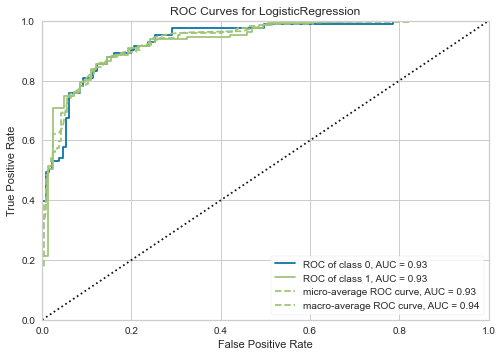

In [39]:
plot_model(tuned_lr)

#### Logistic Regression model Feature Importance

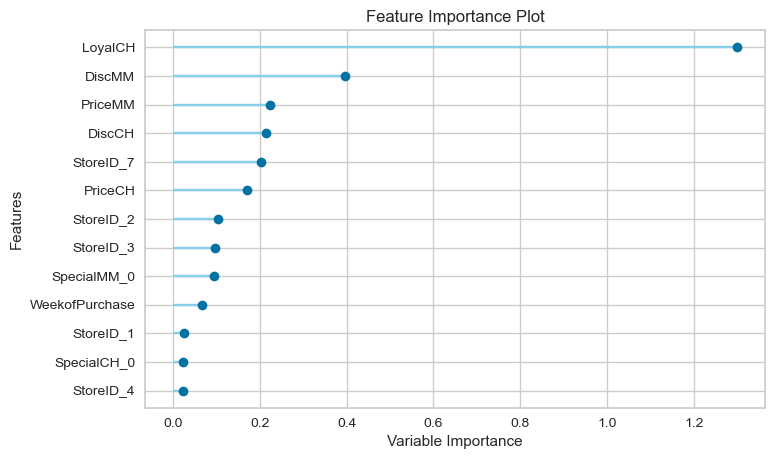

In [40]:
plot_model(tuned_lr, plot = 'feature_all')

#### Logistic Regression model prediction performance on holdout 

#### Best Performance out of the 3 Models
- F1 Macro=0.855, Precision Macro=0.851, Recall Macro=0.855, Accuracy=0.860, AUC=0.935

In [41]:
predict_model(tuned_lr, round=3);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F1 Mac,Prec. Mac
0,Logistic Regression,0.860,0.935,0.855,0.911,0.882,0.710,0.712,0.855,0.851


#### Logistic Regression model Confusion Matrix

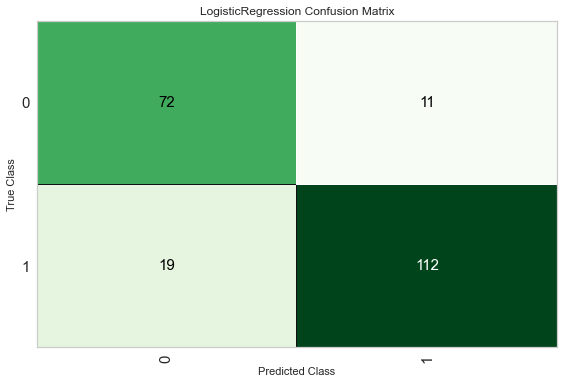

In [42]:
plot_model(tuned_lr, plot = 'confusion_matrix')

#### Logistic Regression model Classification Report

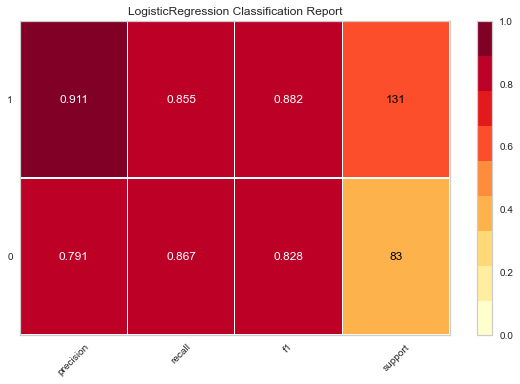

In [43]:
plot_model(tuned_lr, plot = 'class_report')

#### Logistic Regression model Threshold Plot

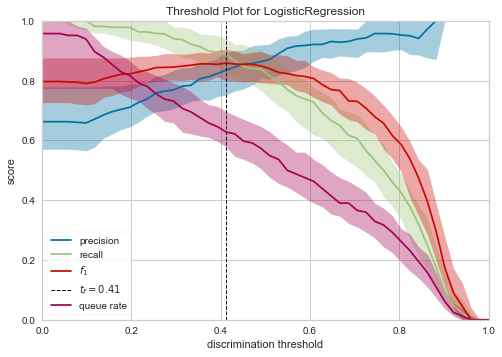

In [44]:
plot_model(tuned_lr, plot='threshold')

---
### Logistic Regression - Manuel method instead of Pycaret
 
#### Before hyperparameter tuning

In [45]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=123).fit(X_train_all, y_train)

In [46]:
from sklearn.metrics import f1_score, classification_report

lr_preds = clf_lr.predict(X_test_all)

print("F1 Macro= {:.3f}".format(f1_score(y_test, lr_preds, average='macro')))
print(classification_report(y_test, lr_preds))

F1 Macro= 0.804
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        84
           1       0.82      0.89      0.86       130

    accuracy                           0.82       214
   macro avg       0.82      0.80      0.80       214
weighted avg       0.82      0.82      0.82       214



#### Pipeline for SMOTE, PCA
#### Pass the pipeline object into GridSearchCV for hyperparameter tuning with Stratified K-Folds = 5, and 3 jobs running in parallel  

In [47]:
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

sm = SMOTE(random_state = 42)
lrc = LogisticRegression(random_state=123)
pca = PCA()

pipe1 = Pipeline([('sm', sm), ('pca', pca), ('lrc', lrc)])

param_lr = {
    'pca__n_components': [4, 5, 6, 7, 10],
    'lrc__C': [1.0, 0.024, 0.01, 0.001],
    'lrc__class_weight':[None, 'balanced'],
}

search_1 = GridSearchCV(pipe1, param_lr, 
                      cv=5, n_jobs=3, scoring='f1_macro', return_train_score=True)

In [48]:
search_lr = search_1.fit(X_train_all, y_train)

#### Best hyperparameter values after tuning

In [49]:
search_lr.best_params_
search_lr.best_score_
search_lr.best_estimator_

{'lrc__C': 0.024, 'lrc__class_weight': None, 'pca__n_components': 5}

0.8199592648002902

Pipeline(memory=None,
         steps=[('sm',
                 SMOTE(k_neighbors=5, n_jobs=None, random_state=42,
                       sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('lrc',
                 LogisticRegression(C=0.024, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

#### Model performance after hyperparameter tuning

In [50]:
lr_bpreds = search_lr.predict(X_test_all)

print("F1 Macro= {:.3f}".format(f1_score(y_test, lr_bpreds, average='macro')))
print(classification_report(y_test, lr_bpreds))

F1 Macro= 0.793
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        84
           1       0.83      0.85      0.84       130

    accuracy                           0.80       214
   macro avg       0.79      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214



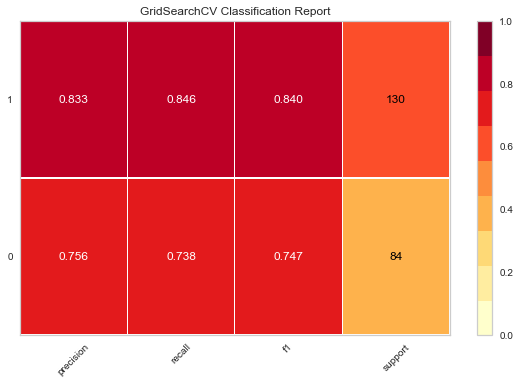

In [51]:
from yellowbrick.classifier import classification_report, confusion_matrix

visualizer_lr = classification_report(search_lr, X_train_all, y_train, X_test_all, y_test, classes = [0 ,1], support=True);

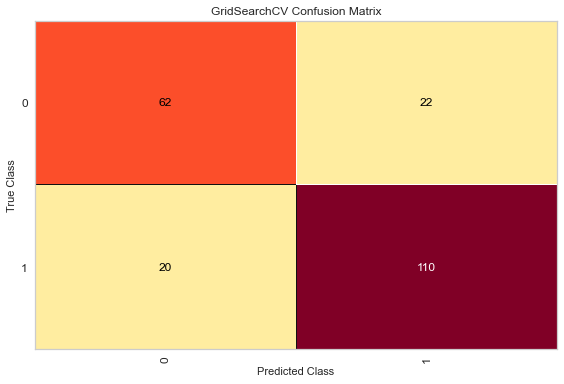

In [52]:
confusion_matrix(search_lr, X_train_all, y_train, X_test_all, y_test, classes=[0, 1]);

---
### Model 2: Create Gradient Boosting Classifier

In [53]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F1 Mac,Prec. Mac
0,0.8098,0.8802,0.8163,0.8602,0.8377,0.6084,0.6097,0.8040,0.8015
1,0.8282,0.9049,0.8571,0.8571,0.8571,0.6418,0.6418,0.8209,0.8209
2,0.8282,0.9036,0.8182,0.8901,0.8526,0.6476,0.6509,0.8234,0.8201
3,0.8025,0.8650,0.8061,0.8587,0.8316,0.5933,0.5951,0.7964,0.7936
4,0.7901,0.8536,0.8163,0.8333,0.8247,0.5633,0.5635,0.7816,0.7803
Mean,0.8118,0.8814,0.8228,0.8599,0.8408,0.6109,0.6122,0.8053,0.8033
SD,0.0148,0.0204,0.0177,0.0180,0.0123,0.0313,0.0318,0.0156,0.0156


#### Tune Gradient Boosting Classifier to optimize F1 Macro score, with 50 iterations

In [54]:
tuned_gbc = tune_model(gbc, optimize = 'F1 Mac', n_iter=50) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F1 Mac,Prec. Mac
0,0.8160,0.8904,0.8367,0.8542,0.8454,0.6181,0.6183,0.8090,0.8077
1,0.8344,0.9137,0.8673,0.8586,0.8629,0.6537,0.6537,0.8268,0.8277
2,0.8344,0.8845,0.8586,0.8673,0.8629,0.6537,0.6537,0.8268,0.8260
3,0.8025,0.8878,0.7857,0.8750,0.8280,0.5976,0.6024,0.7980,0.7956
4,0.8210,0.8593,0.8265,0.8710,0.8482,0.6305,0.6318,0.8151,0.8123
Mean,0.8216,0.8871,0.8350,0.8652,0.8495,0.6307,0.6320,0.8152,0.8139
SD,0.0120,0.0173,0.0287,0.0077,0.0130,0.0215,0.0200,0.0110,0.0119


#### Plot tuned Gradient Boosting Classifier to visualize model performance - ROC Curve

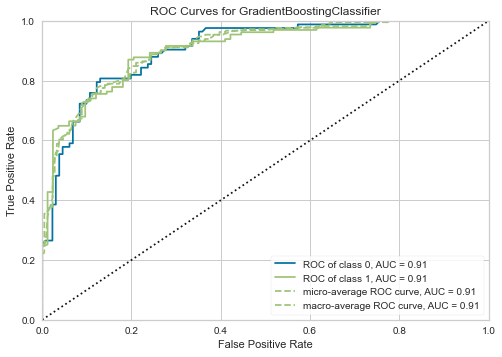

In [55]:
plot_model(tuned_gbc)

#### Gradient Boosting Classifier parameters before tuning

In [56]:
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


#### Gradient Boosting Classifier parameters after hyperparameter tuning

In [57]:
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.302, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=9,
                           min_weight_fraction_leaf=0.0, n_estimators=130,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


#### Gradient Boosting Classifier Feature Importance

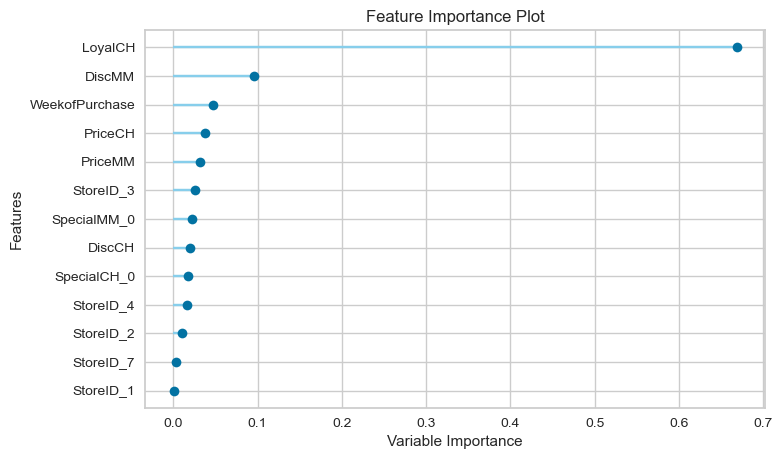

In [58]:
plot_model(tuned_gbc, plot = 'feature_all')

#### Gradient Boosting Classifier prediction performance on holdout

In [59]:
predict_model(tuned_gbc, round=3);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F1 Mac,Prec. Mac
0,Gradient Boosting Classifier,0.808,0.906,0.802,0.875,0.837,0.606,0.610,0.803,0.799


#### Gradient Boosting Classifier Confusion Matrix

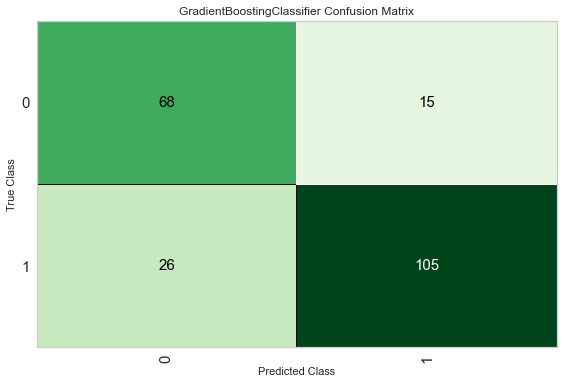

In [60]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

#### Gradient Boosting Classifier Classification Report

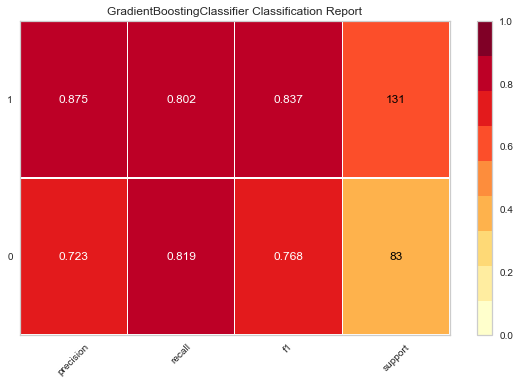

In [61]:
plot_model(tuned_gbc, plot = 'class_report')

#### Gradient Boosting Classifier Threshold Plot

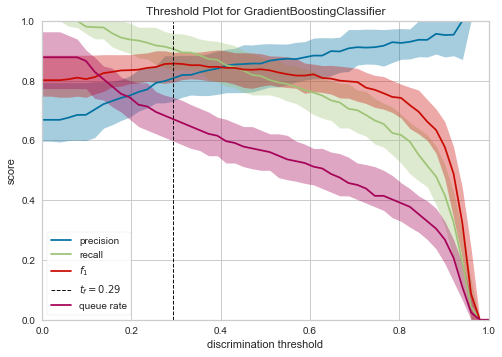

In [62]:
plot_model(tuned_gbc, plot = 'threshold')

---
### Gradient Boosting Classifier - Manuel method instead of Pycaret

#### Before hyperparameter tuning

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gbc = GradientBoostingClassifier(random_state=123).fit(X_train_all, y_train)

In [64]:
from sklearn.metrics import classification_report

gbc_preds = clf_gbc.predict(X_test_all)

print("F1 Macro= {:.3f}".format(f1_score(y_test, gbc_preds, average='macro')))
print(classification_report(y_test, gbc_preds))

F1 Macro= 0.783
              precision    recall  f1-score   support

           0       0.79      0.67      0.72        84
           1       0.80      0.88      0.84       130

    accuracy                           0.80       214
   macro avg       0.80      0.78      0.78       214
weighted avg       0.80      0.80      0.80       214



#### Pipeline for SMOTE, PCA
#### Pass the pipeline object into GridSearchCV for hyperparameter tuning with Stratified K-Folds = 5, and 3 jobs running in parallel

In [65]:
from sklearn.feature_selection import RFE

gbc = GradientBoostingClassifier(random_state=123)
rfe = RFE(estimator=gbc, n_features_to_select=10)

pipe2 = Pipeline([('sm', sm), ('pca', pca), ('rfe', rfe), ('gbc', gbc)]) 

param_gbc = {
    'pca__n_components': [5, 10],
    'rfe__n_features_to_select': [4, 5],
    'gbc__learning_rate': [0.1, 0.184, 0.3],
    'gbc__max_depth':[3, 2],
    'gbc__min_samples_leaf': [1, 5],
    'gbc__min_samples_split': [2, 10],
    'gbc__subsample': [1, 0.4]
}

search_2 = GridSearchCV(pipe2, param_gbc, 
                      cv=5, n_jobs=3, scoring='f1_macro', return_train_score=True)

In [66]:
search_gbc = search_2.fit(X_train_all, y_train)

#### Best hyperparameter values after tuning

In [67]:
search_gbc.best_params_
search_gbc.best_score_
search_gbc.best_estimator_

{'gbc__learning_rate': 0.3,
 'gbc__max_depth': 2,
 'gbc__min_samples_leaf': 1,
 'gbc__min_samples_split': 10,
 'gbc__subsample': 1,
 'pca__n_components': 10,
 'rfe__n_features_to_select': 4}

0.8216382911516483

Pipeline(memory=None,
         steps=[('sm',
                 SMOTE(k_neighbors=5, n_jobs=None, random_state=42,
                       sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('rfe',
                 RFE(estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                          criterion='friedman_mse',
                                                          init=None,
                                                          learning_rate=0.1,
                                                          loss='de...
                                            learning_rate=0.3, loss='deviance',
                                            max_depth=2, max_features=None,
                                            max_leaf_nodes=None,
                 

#### Model performance after hyperparameter tuning

In [68]:
gbc_bpreds = search_gbc.predict(X_test_all)

print("F1 Macro= {:.3f}".format(f1_score(y_test, gbc_bpreds, average='macro')))
print(classification_report(y_test, gbc_bpreds))

F1 Macro= 0.800
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        84
           1       0.85      0.83      0.84       130

    accuracy                           0.81       214
   macro avg       0.80      0.80      0.80       214
weighted avg       0.81      0.81      0.81       214



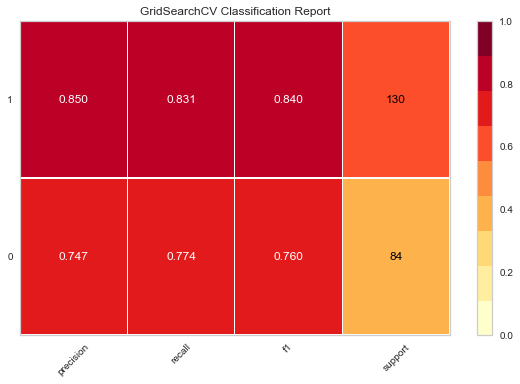

In [69]:
from yellowbrick.classifier import classification_report, confusion_matrix

visualizer_gbc = classification_report(search_gbc, X_train_all, y_train, X_test_all, y_test, classes = [0 ,1], support=True);

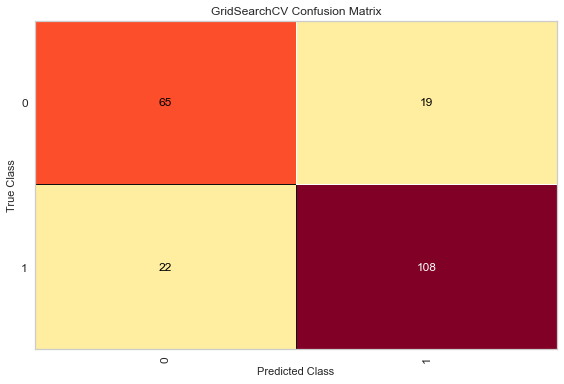

In [70]:
confusion_matrix(search_gbc, X_train_all, y_train, X_test_all, y_test, classes=[0, 1]);

---
### Model 3: Create CatBoost Classifier

In [71]:
cb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F1 Mac,Prec. Mac
0,0.8037,0.8884,0.8163,0.8511,0.8333,0.5948,0.5955,0.7973,0.7951
1,0.8098,0.8933,0.8571,0.8317,0.8442,0.6003,0.6007,0.8001,0.8029
2,0.8160,0.8971,0.8182,0.8710,0.8438,0.6204,0.6222,0.8099,0.8069
3,0.8210,0.8764,0.8265,0.8710,0.8482,0.6305,0.6318,0.8151,0.8123
4,0.7901,0.8430,0.8265,0.8265,0.8265,0.5609,0.5609,0.7805,0.7805
Mean,0.8081,0.8796,0.8289,0.8502,0.8392,0.6014,0.6022,0.8006,0.7995
SD,0.0107,0.0196,0.0147,0.0188,0.0080,0.0240,0.0246,0.0119,0.0111


#### Tune CatBoost Classifier to optimize F1 Macro score, with 30 iterations

In [72]:
tuned_cb = tune_model(cb, optimize = 'F1 Mac', n_iter=30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F1 Mac,Prec. Mac
0,0.8282,0.8874,0.8469,0.8646,0.8557,0.6436,0.6438,0.8218,0.8204
1,0.8466,0.9133,0.8673,0.8763,0.8718,0.6810,0.6810,0.8405,0.8397
2,0.8037,0.8920,0.8182,0.8526,0.8351,0.5929,0.5937,0.7963,0.7940
3,0.7963,0.8808,0.7857,0.8652,0.8235,0.5840,0.5878,0.7913,0.7887
4,0.8210,0.8551,0.8163,0.8791,0.8466,0.6325,0.6350,0.8159,0.8128
Mean,0.8192,0.8857,0.8269,0.8676,0.8465,0.6268,0.6282,0.8132,0.8111
SD,0.0179,0.0188,0.0280,0.0095,0.0166,0.0353,0.0344,0.0178,0.0184


#### Plot tuned CatBoost Classifier to visualize model - ROC Curve

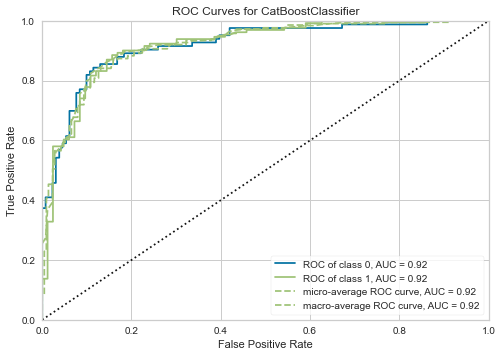

In [73]:
plot_model(tuned_cb)

#### CatBoost Classifier parameters before tuning

In [74]:
plot_model(cb, plot = 'parameter')

,Parameters
nan_mode,Min
eval_metric,Logloss
iterations,1000
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


#### CatBoost Classifier parameters after hyperparameter tuning

In [75]:
plot_model(tuned_cb, plot = 'parameter')

,Parameters
nan_mode,Min
eval_metric,Logloss
iterations,190
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


#### Tuned CatBoost Classifier Feature Importance

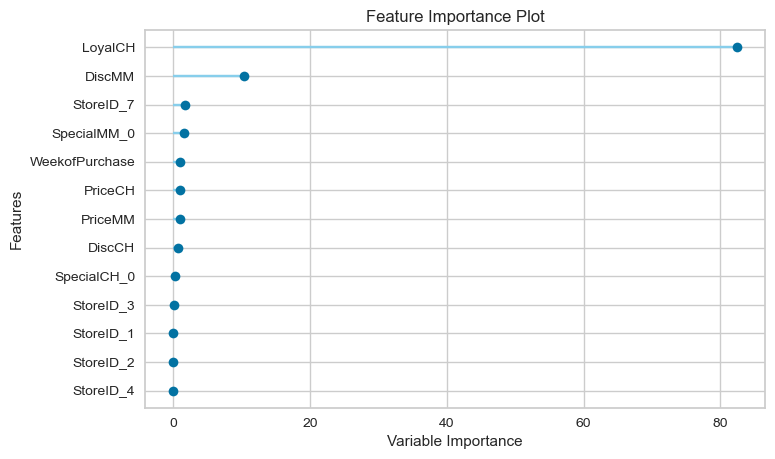

In [76]:
plot_model(tuned_cb, plot = 'feature_all')

#### Tuned CatBoost Classifier prediction performance on holdout

#### 2nd Best model performance out of the 3 models, after Logistic Regression

In [77]:
predict_model(tuned_cb, round=3);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F1 Mac,Prec. Mac
0,CatBoost Classifier,0.846,0.919,0.832,0.908,0.869,0.683,0.687,0.841,0.837


#### Tuned CatBoost Classifier Confusion Matrix

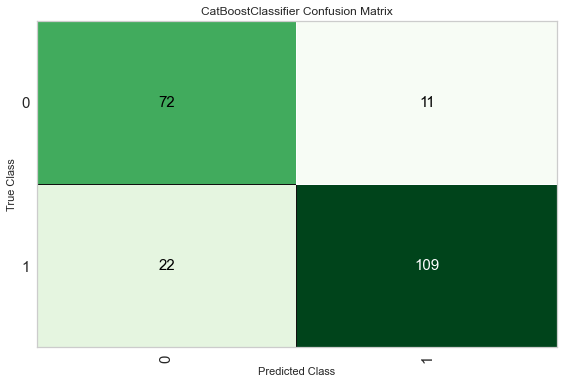

In [78]:
plot_model(tuned_cb, plot = 'confusion_matrix')

#### Tuned CatBoost Classifier Classification Report

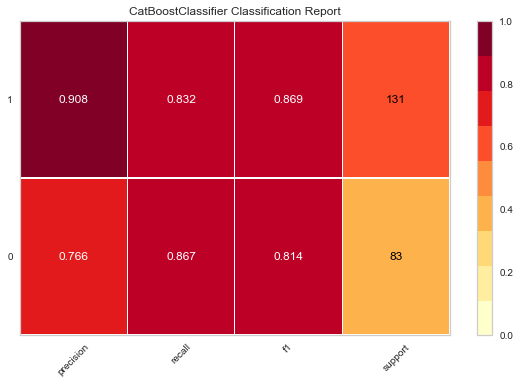

In [79]:
plot_model(tuned_cb, plot = 'class_report')

#### Tuned CatBoost Classifier Threshold Plot

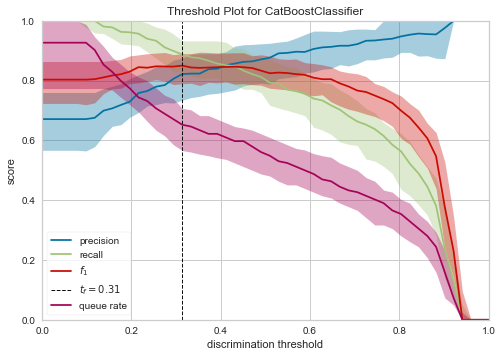

In [80]:
plot_model(tuned_cb, plot = 'threshold')

#### Tuned CatBoost Classifier SHAP Value Graph

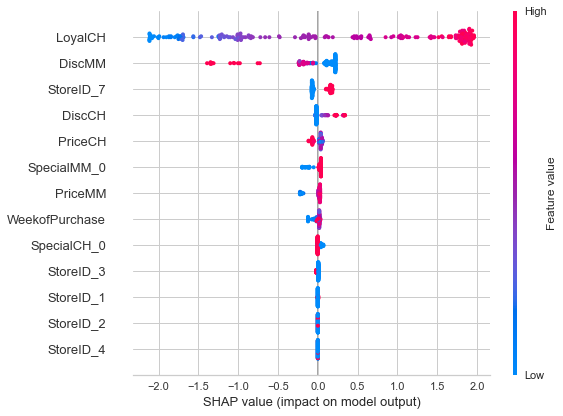

In [81]:
interpret_model(tuned_cb)

---
### CatBoost Classifier - Manuel method instead of Pycaret

#### Before hyperparameter tuning

In [82]:
from catboost import CatBoostClassifier

clf_cb = CatBoostClassifier(iterations=300, l2_leaf_reg=9, depth=1, max_leaves=2, learning_rate=0.01, 
                            random_state=123, silent=True).fit(X_train_all, y_train)

In [83]:
from sklearn.metrics import classification_report

cb_preds = clf_cb.predict(X_test_all)

print("F1 Macro= {:.3f}".format(f1_score(y_test, cb_preds, average='macro')))
print(classification_report(y_test, cb_preds))

F1 Macro= 0.781
              precision    recall  f1-score   support

           0       0.80      0.65      0.72        84
           1       0.80      0.89      0.84       130

    accuracy                           0.80       214
   macro avg       0.80      0.77      0.78       214
weighted avg       0.80      0.80      0.79       214



#### Pipeline for SMOTE, PCA
#### Pass the pipeline object into GridSearchCV for hyperparameter tuning with Stratified K-Folds = 5

In [93]:
cb = CatBoostClassifier(random_state=123, silent=True)

pipe3 = Pipeline([('sm', sm), ('pca', pca), ('cb', cb)])

param_cb = {
    'pca__n_components': [5, 10],
    'cb__random_strength': [1, 0.7],
    'cb__learning_rate': [0.01, 0.03]
}

search_3 = GridSearchCV(pipe3, param_cb, 
                      cv=5, scoring='f1_macro', return_train_score=True)

In [94]:
%time search_cb = search_3.fit(X_train_all, y_train)

Wall time: 2min 42s


#### Best hyperparameter values after tuning

In [95]:
search_cb.best_params_
search_cb.best_score_
search_cb.best_estimator_

{'cb__learning_rate': 0.01, 'cb__random_strength': 0.7, 'pca__n_components': 5}

0.8108097229217035

Pipeline(memory=None,
         steps=[('sm',
                 SMOTE(k_neighbors=5, n_jobs=None, random_state=42,
                       sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('cb',
                 <catboost.core.CatBoostClassifier object at 0x000002EA7FE0C7C0>)],
         verbose=False)

#### Model performance after hyperparameter tuning

In [96]:
cb_bpreds = search_cb.predict(X_test_all)

print("F1 Macro= {:.3f}".format(f1_score(y_test, cb_bpreds, average='macro')))
print(classification_report(y_test, cb_bpreds))

F1 Macro= 0.777
              precision    recall  f1-score   support

           0       0.71      0.76      0.74        84
           1       0.84      0.80      0.82       130

    accuracy                           0.79       214
   macro avg       0.77      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214



In [97]:
from sklearn.metrics import confusion_matrix

print("\nConfusion Matrix:")
unique_label = np.unique([y_test, cb_bpreds])
cmtx = pd.DataFrame(confusion_matrix(y_test, cb_bpreds, labels=unique_label), 
                    index=['true:{:}'.format(x) for x in unique_label], 
                    columns=['pred:{:}'.format(x) for x in unique_label])
print(cmtx)


Confusion Matrix:
        pred:0  pred:1
true:0      64      20
true:1      26     104
